In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as numpy
import pandas as pd

DATA COLLECTION

In [3]:
data=pd.read_csv('StudentsPerformance.csv')
data.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [4]:
data.shape

(1000, 8)

DATA CHECKS

In [5]:
data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
data.duplicated().any()

False

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
for c in data.columns:
    if data[c].dtype=='object':
        print(data[c].value_counts())
        print('\n')

gender
female    518
male      482
Name: count, dtype: int64


race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64


parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


lunch
standard        645
free/reduced    355
Name: count, dtype: int64


test preparation course
none         642
completed    358
Name: count, dtype: int64




In [9]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [10]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


NEW COLUMNS

In [11]:
data['total score']=data['math score']+data['reading score']+data['writing score']
data['avg score']=data['total score']/3

In [12]:
data.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,avg score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [13]:
print(f"No. of students with full marks in maths: {len(data[data['math score']==100])}")
print(f"No. of students with full marks in reading: {len(data[data['reading score']==100])}")
print(f"No. of students with full marks in writing: {len(data[data['writing score']==100])}")

No. of students with full marks in maths: 7
No. of students with full marks in reading: 17
No. of students with full marks in writing: 14


VISUALIZATION

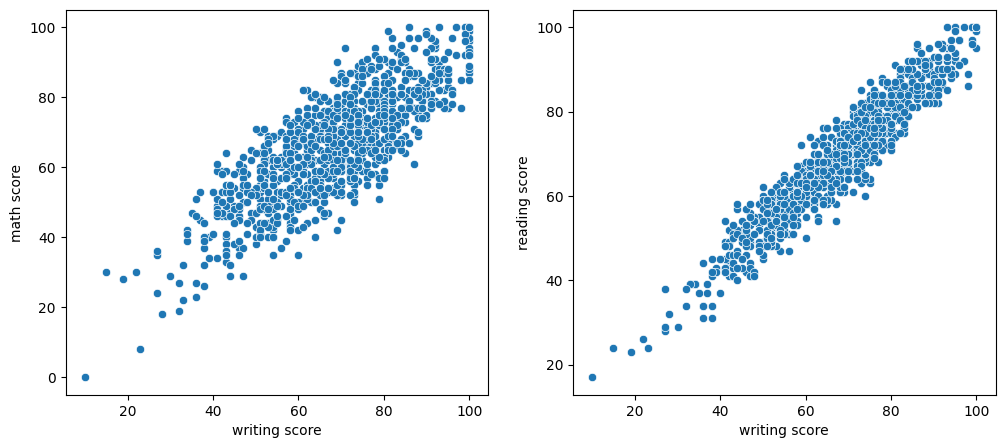

In [14]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x=data['writing score'],y=data['math score'])
plt.subplot(1,2,2)
sns.scatterplot(x=data['writing score'],y=data['reading score']);

females perform better:

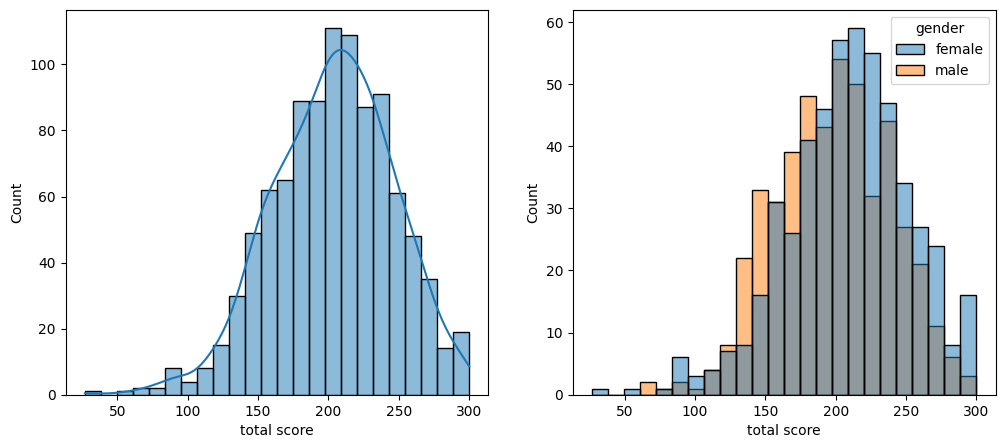

In [28]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data=data,x='total score',kde=True)
plt.subplot(1,2,2)
sns.histplot(data=data,x='total score',hue='gender');

total score vs race and gender

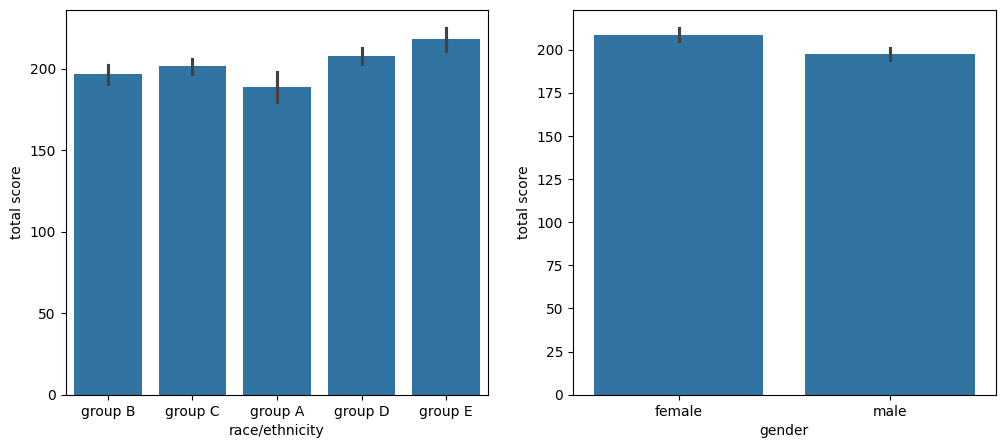

In [38]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x='race/ethnicity',y='total score',data=data)
plt.subplot(1,2,2)
sns.barplot(x='gender',y='total score',data=data);

count of male female

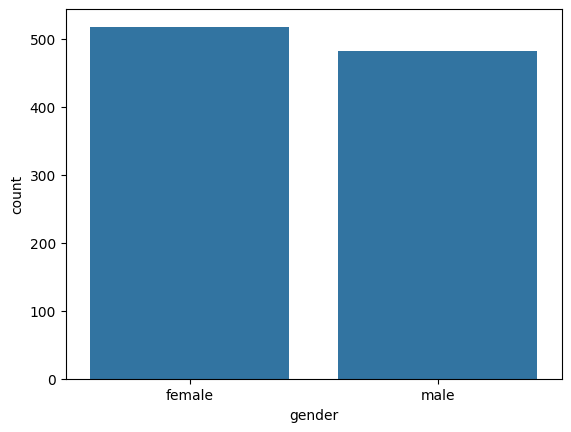

In [37]:
sns.countplot(x="gender", data=data);

total score vs parental level of education

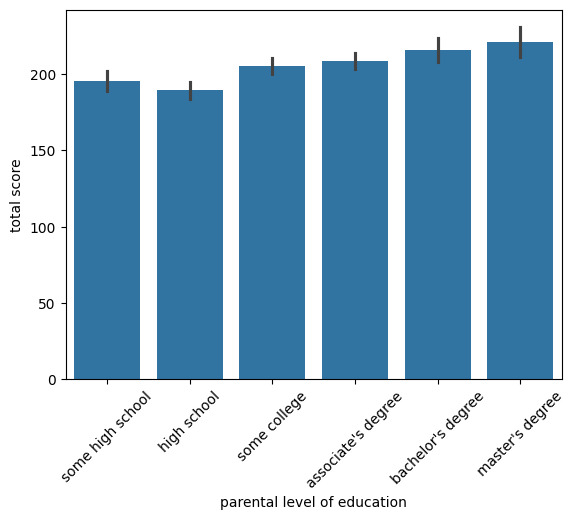

In [36]:
order = [
    "some high school",
    "high school",
    "some college",
    "associate's degree",
    "bachelor's degree",
    "master's degree"
]

sns.barplot(
    x="parental level of education",
    y="total score",
    order=order,
    data=data
)
plt.xticks(rotation=45);
